## Esetrcizio 11.3 - Fit di funzione 2D

In questo esercizio ho esteso il modello dell'esercizio precedente per fittare una funzione 2D
$$
f(x,y)=\sin(x^2+y^2)
$$
nel dominio $[-3/2,3/2]\times[-3/2,3/2]$. Ho dovuto modificare la forma dei dati da dare in ingresso al metodo `model.fit` (da un vettore a una matrice), così come l'`input_shape` del primo layer è passata da 1 a 2.

/tmp/ipykernel_291966/1658469939.py:46: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


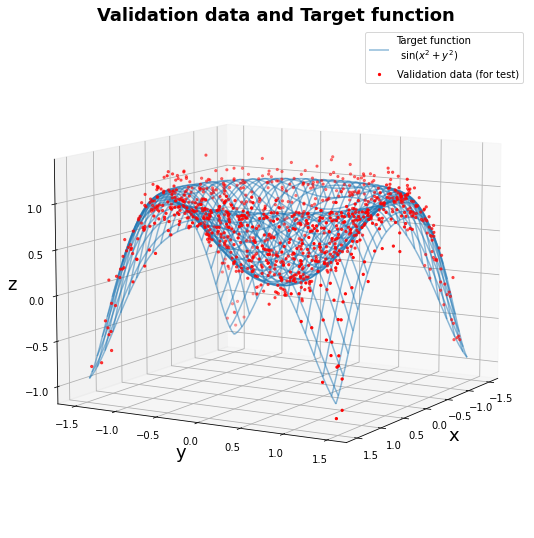

In [97]:
import matplotlib.pyplot as plt
import numpy as np

# ==============================================
# Define parameters of an ideal linear function.
# We want to predict them after
# ==============================================

# parametri
N_epochs = 50
N_train = 8000 # <<< train
N_valid = 1000 # <<< test
Sigma = 0.1

# ==============================================
# Generate input data, deviating 
# from ideal behaviour [random noise - sigma]
# ==============================================

np.random.seed(0)
lim = 3./2.
x_train = np.random.uniform(-lim, lim, N_train)    # training inputs
x_valid = np.random.uniform(-lim, lim, N_valid)    # ...

y_train = np.random.uniform(-lim, lim, N_train)    # training inputs
y_valid = np.random.uniform(-lim, lim, N_valid)    # ...

XY_train = np.column_stack((x_train,y_train))      # in the format needed
XY_valid = np.column_stack((x_valid,y_valid))      #   by `model.fit` method

def f(x, y):
    return np.sin((x ** 2 + y ** 2))

z_target = f(x_valid, y_valid)                     # target polinomial function

sigma = Sigma                                      # noise standard deviation
z_train = np.random.normal(f(x_train,y_train), sigma) 
                                                   # array of measures from which we want to guess regression parameters
z_valid = np.random.normal(f(x_valid,y_valid), sigma)
                                                   # array of measures from which we want to test prediction ability of the NN

# plot validation and target dataset
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (7,7))
ax = Axes3D(fig)
fig.add_axes(ax)

x_surf = np.arange(-lim,lim, 0.05)
y_surf = np.arange(-lim,lim, 0.05)
X_surf, Y_surf = np.meshgrid(x_surf,y_surf)
ax.plot_wireframe(  X_surf, Y_surf, f(X_surf,Y_surf), 
                    rstride=2, cstride=2, 
                    label='Target function\n $\sin(x^2+y^2)$',
                    alpha = 0.5)
#ax.scatter(x_valid, y_valid, z_target, label = "Target function\n $\sin(x^2+y^2)$")
ax.scatter(x_valid, y_valid, z_valid, marker = ".", color = "r", label='Validation data (for test)')
ax.set_xlabel("x", fontsize = 18)
ax.set_ylabel("y", fontsize = 18)
ax.set_zlabel("z", fontsize = 18)
plt.title("Validation data and Target function", fontsize = 18, fontweight = "bold")
ax.legend()
ax.view_init(10, 30)

plt.show()


In questo grafico è mostrato un confronto tra la funzione target che vogliamo fittare e i dati che utilizziamo per la validazione finale. Questi ultimi sono simili ai dati utilizzati per la calibrazione (*train*), ma sono molti meno e sono indipendenti dai essi.

In [98]:
# Use PYTHON 3.9.12

# ==============================================
# INITIALIZE Neural Network (Sequential) model:
# Many neurons are needed to make the fitting job
# and activation functions need to be specifief.
# ==============================================

# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
# activation: relu-si, elu-ni, sigmoid-no, softmax-no, softplus-no, softsign-no, tanh-no, exponential-no
act = 'tanh'
model.add(Dense(40, input_shape=(2,), activation = act)) # nota: funzione di attivazione (esplorare quali vanno meglio)
model.add(Dense(38, activation = act))
model.add(Dense(35, activation = act))
model.add(Dense(13, activation = act))
model.add(Dense(1, activation = act))

# compile the model choosing optimizer, loss and metrics objects
# optimizers: sgd-sì, rmsprop-sì, adam-?, adadelta-sì, adagrad-?, adamax-ni, nadam-sì, ftrl-no
opt = 'nadam'
# loss functios: mse-sì, mae-nì, msle-ni, logcosh-ni, kld-no(molto strana)
lf = 'mse'
model.compile(optimizer=opt, loss=lf, metrics=['mse'])

# ==============================================
# Get a summary of our composed model
# ==============================================
model.summary()

# ==============================================
# TRAIN THE MODEL 
# I feed the neuron with the set of (x,y) training 
# pairs. The optimizer finds the best weights 
# minimizing the Mean Square Error loss function 
# ==============================================

# Fit the model over 10 epochs of 32 batch size each.
# Report training progress against validation data
history = model.fit(    x=XY_train, y=z_train, 
                        batch_size=32, epochs=N_epochs,
                        # shuffle input before each epoch (not mandatory)
                        shuffle=True,                        
                        validation_data=(XY_valid, z_valid))

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_125 (Dense)           (None, 40)                120       
                                                                 
 dense_126 (Dense)           (None, 38)                1558      
                                                                 
 dense_127 (Dense)           (None, 35)                1365      
                                                                 
 dense_128 (Dense)           (None, 13)                468       
                                                                 
 dense_129 (Dense)           (None, 1)                 14        
                                                                 
Total params: 3,525
Trainable params: 3,525
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
250/250 [==============================]

TEST DATA evaluation
Test loss:      0.012583354488015175
Test accuracy:  0.012583354488015175

EXACT CURVE evaluation
Test loss:      0.00228384742513299
Test accuracy:  0.00228384742513299


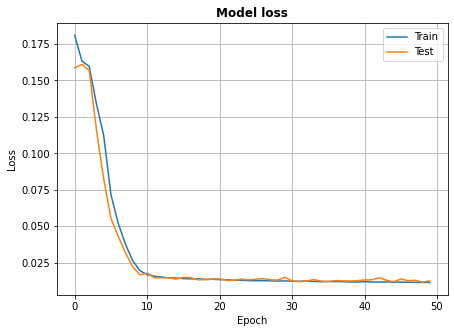

/tmp/ipykernel_291966/2580166180.py:56: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


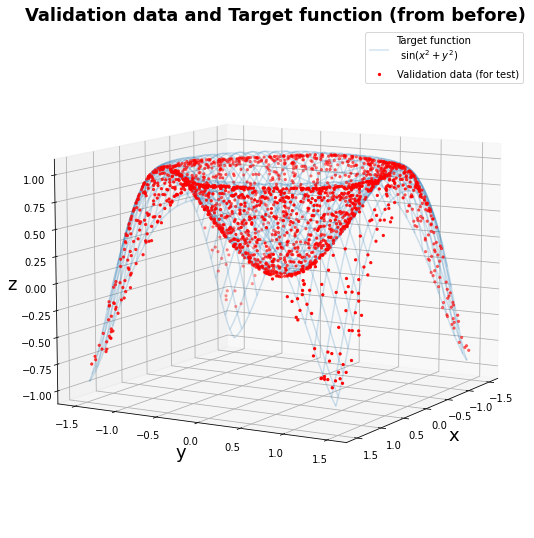

In [99]:
# ==============================================
# Return Weights and Biases
# ==============================================

# print("Guessed parameters")
# w = model.get_weights()
# print(w)

# ==============================================
# EVALUATE MODEL
# ==============================================

# evaluate with TEST data
print("TEST DATA evaluation")
score = model.evaluate(XY_valid, z_valid, batch_size=32, verbose=0)
print('Test loss:     ', score[0])
print('Test accuracy: ', score[1])
print()

# evaluate with the EXACT curve
print("EXACT CURVE evaluation")
score = model.evaluate(XY_valid, z_target, batch_size=32, verbose=0)
print('Test loss:     ', score[0])
print('Test accuracy: ', score[1])

# ==============================================
# Training history
# ==============================================

plt.figure(figsize=(7,5))

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss', fontweight = "bold")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.grid()
#plt.show()
#plt.savefig("imgs/sgm_"+str(sigma)+".png")
plt.show()

# ==============================================
# COMPARE MODEL predictions with TARGET FUNCTION
# ==============================================

# generate predictions
x_predicted = np.random.uniform(-lim, lim, 2000) 
y_predicted = np.random.uniform(-lim, lim, 2000) 
XY_predicted = np.column_stack((x_predicted,y_predicted))
z_predicted = model.predict(XY_predicted)

# plot
fig = plt.figure(figsize = (7,7))
ax = Axes3D(fig)
fig.add_axes(ax)
ax.plot_wireframe(  X_surf, Y_surf, f(X_surf,Y_surf), 
                    rstride=2, cstride=2, 
                    label='Target function\n $\sin(x^2+y^2)$',
                    alpha = 0.2)
ax.scatter(x_predicted, y_predicted, z_predicted, marker = ".", color = "r", label='Validation data (for test)')
ax.set_xlabel("x", fontsize = 18)
ax.set_ylabel("y", fontsize = 18)
ax.set_zlabel("z", fontsize = 18)
plt.title("Validation data and Target function (from before)", fontsize = 18, fontweight = "bold")
ax.legend()
ax.view_init(10, 30)


plt.show()

### Osservazioni

Durante i tentativi che mi hanno portato al modello finale, la principale difficoltà è stata **predirre i punti sulle quattro code**. Come osservato in precedenza, l'aumento delle epoche oltre un certo limite non ha l'effetto di migliorare la predizione, mentre risulta efficace **aumentare** di molto il **numero dei dati di training** e regolare i livelli della rete aumentando complessivamente il **numero di parametri** (`Param #`) che il modello dovrà calibrare.

Nella seguente immagine ad esempio avevo utilizzato $N_{train} = 3000$, e livelli con rispettivamente 40, 20, 10, 5, e 1 nodo, e la funzione di attivazione era una `relu` e l'optimizer era un `rmsprop`. 

<img src="../img/11_tails.png" width="500" />

In generale, affinché il modello possa calinbrarsi bene, dobbiamo allora cercare di *riempire bene il dominio* di punti di test (sarebbe ad esempio interessante ragionare sulla possibilità di generarli con densità maggiore in corrispondenza dei quattro angoli, rubando l'idea all'*importance sampling*). Considerando che ciascuna coda sottende circa 1/8 dell'area del dominio, provo a usare $8000$ punti di train.

Per riuscire a fittare bene le code, rispetto all'esercizio 11.2 ho dovuto inoltre modificare nuovamente la funzione di attivazione e l'ottimizzatore, scegliendo rispettivamente `tanh` e `nadam`. I parametri che mi hanno permesso una calibrazione ritenuta sufficiente sono quelli che ho lasciato salvati in questo Notebook. 